In [3]:
%matplotlib inline
import os
import re

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

/lfs1/home/jackyu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'climatools.scripts.g1_threshold' from '/lfs1/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [4]:
# for printing some input parameters

def innames():
    return ['vstar', 'nband', 'nv', 'dv',
            'flgh2o',
            'tsfc',
            'pressure_reference_1',
            'temperature_reference_1', 
            'pressure_reference_2', 
            'temperature_reference_2',
            'ighigh', 
            'ng', 
            'nref',
            'p_refs',
            't_refs',
            'ng_refs',
            'absth',
            'wgt',
            'option_wgt_flux',
            'option_wgt_k',
            'option_klin',
            'fac_meank',
            'klin']



def pattern_assign(name):
    return ''' 
    parameter .* :: \s* &? \s* ({} \s* = .* \n)
    '''.format(name)

def pattern_data(name):
    return '''
    (data [^/{name}]+ {name}[^,] [^/{name}]+ / [^/]+ /)
    '''.format(name=name)

def pattern_atmpro():
    return '''
    (include \s+ '.*\.pro')
    '''


def get_input_params(code, names):
    results = []
    for name in names:
        regex = re.compile(pattern_assign(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
        regex = re.compile(pattern_data(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
    regex = re.compile(pattern_atmpro(), re.VERBOSE)
    results.extend(regex.findall(code))
        
    results = [result.replace('_r8', '') for result in results]
    return results


In [5]:
analysis = scripts.Analysis()

In [6]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/lfs1/home/jackyu/radiation',
                          'crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band03b_wn_620_720',
                          'ng_18',
                          'g_ascending_k_descending',
                          'refPTs_P_600_T_250',
                          'ng_refs_18',
                          'getabsth_auto',
                          'absth_dlogN_uniform',
                          'wgt_all1',
                          'wgt_flux_2',
                          'wgt_k_1',
                          'crd_0f8bc9f',
                          'atmpro_mls')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [7]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/lfs1/home/jackyu/radiation',
                          'crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band03b_wn_620_720',
                          'ng_18',
                          'g_ascending_k_descending',
                          'refPTs_P_600_T_250',
                          'ng_refs_18',
                          'getabsth_auto',
                          'absth_dlogN_uniform',
                          'wgt_all1',
                          'wgt_flux_2',
                          'wgt_k_1',
                          'crd_0f8bc9f',
                          'atmpro_mls')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [8]:
fig = analysis.fig_fluxcoolr('fig1', vartypes=['cooling rate'])
fig.ggroups = list(crd.data['dgdgs'].coords['g'].values) #list(range(1, 8 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-2, 200)

fig.set_pressure_displayrange(low=1e-2)

In [9]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [10]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [11]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [12]:
with open(os.path.join(crd.rundir, 'lblnew.f'), 
          mode='r', encoding='utf-8') as f:
    c = f.read()

print('\n\n'.join(get_input_params(c, innames())))

vstar = 620

nband = 100

nv = 200

dv = 0.005

tsfc = 294.0

ng = 18

nref = 1

p_refs = (/ 600 /)

t_refs = (/ 250 /)

ng_refs = (/ 18 /)

data wgt
     &     /18*1/

option_wgt_flux = 2

option_wgt_k = 1

option_klin = 0

klin = 6.375563e-24

include 'mls75.pro'


In [13]:
fig.display_hrefanchor()

In [14]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()

table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [15]:
table_dgdgs.display_hrefanchor()

In [16]:
s_abscom = 'Overall absth'
display.HTML(climahtml.getHTML_hrefanchor(s_abscom))

In [17]:
s_ggroup_summary = 'g-group summary'
display.HTML(climahtml.getHTML_hrefanchor(s_ggroup_summary))

In [18]:
#for g in range(1, 20 + 1):
#    s = 'Table: cooling rate. g-group {}'.format(g)
#    html = climahtml.getHTML_hrefanchor(s)
#    display.display(display.HTML(html))

# Figure: cooling rate g-group 1

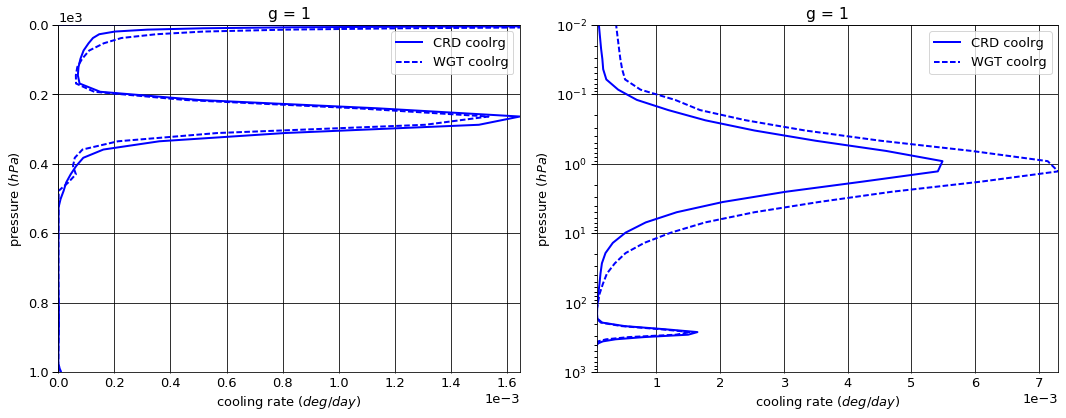

# Figure: cooling rate g-group 2

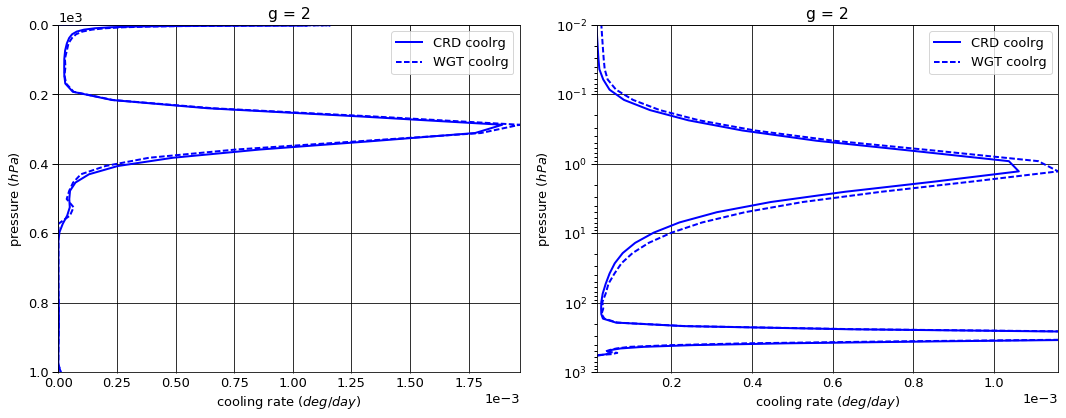

# Figure: cooling rate g-group 3

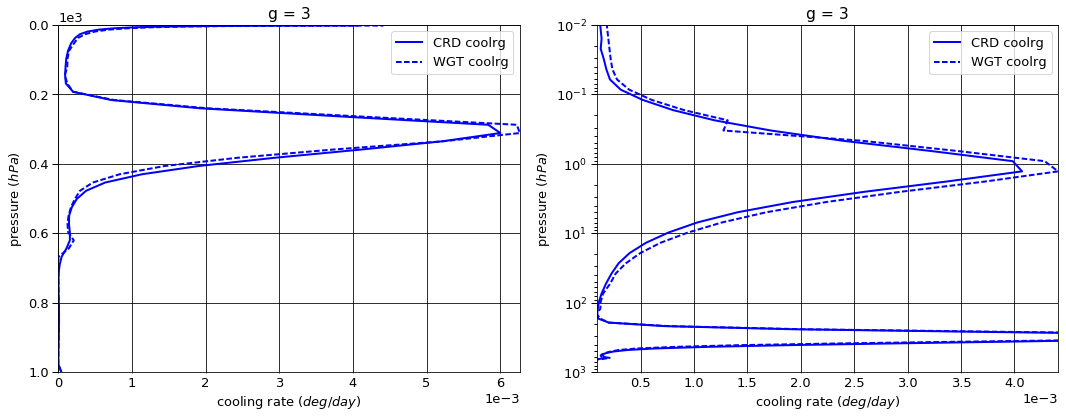

# Figure: cooling rate g-group 4

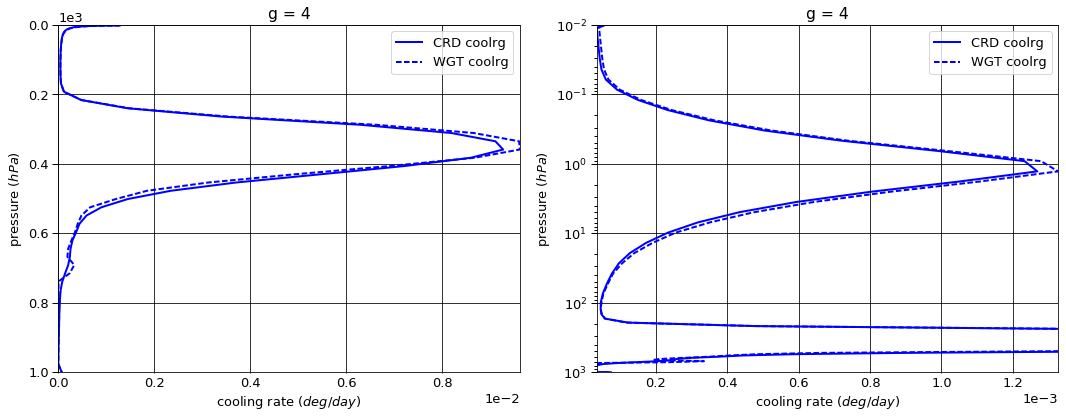

# Figure: cooling rate g-group 5

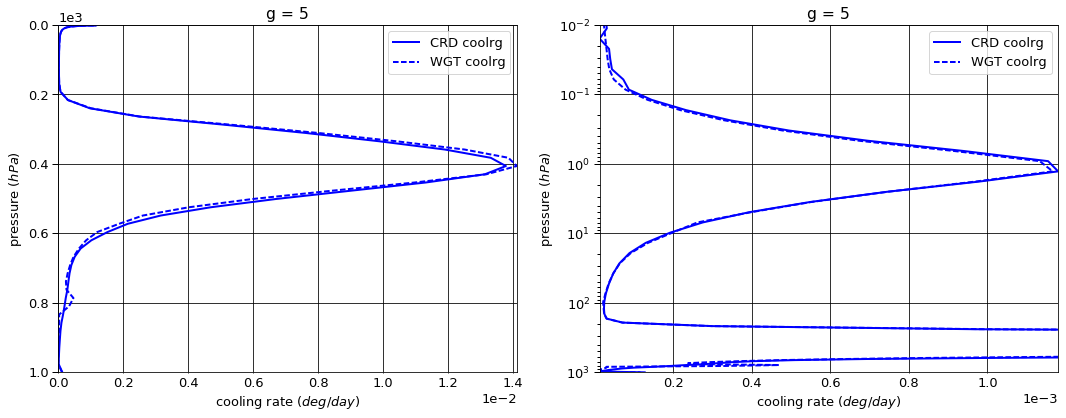

# Figure: cooling rate g-group 6

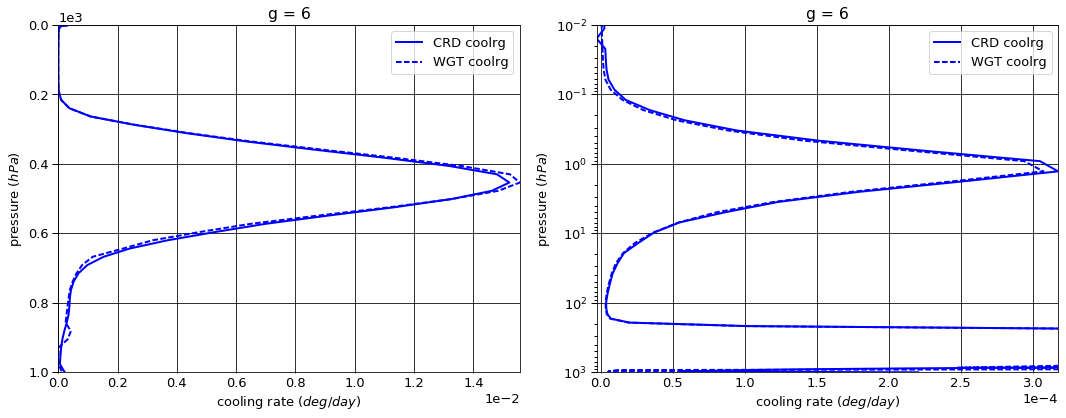

# Figure: cooling rate g-group 7

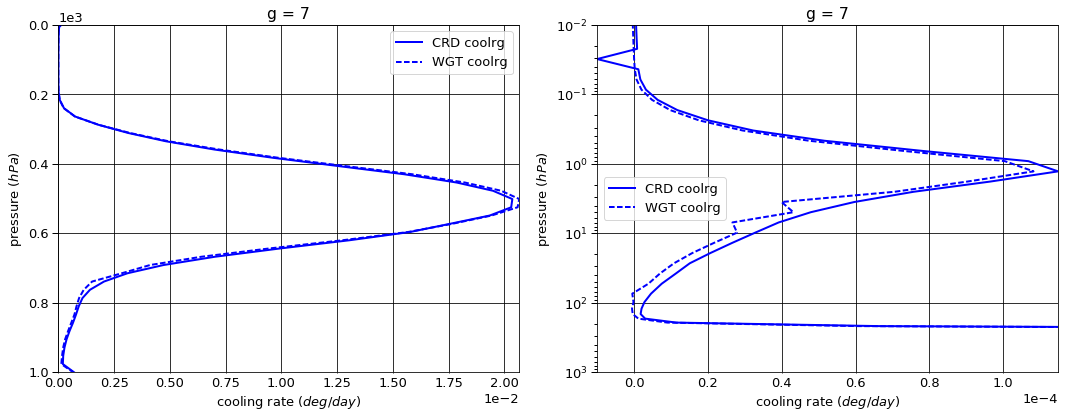

# Figure: cooling rate g-group 8

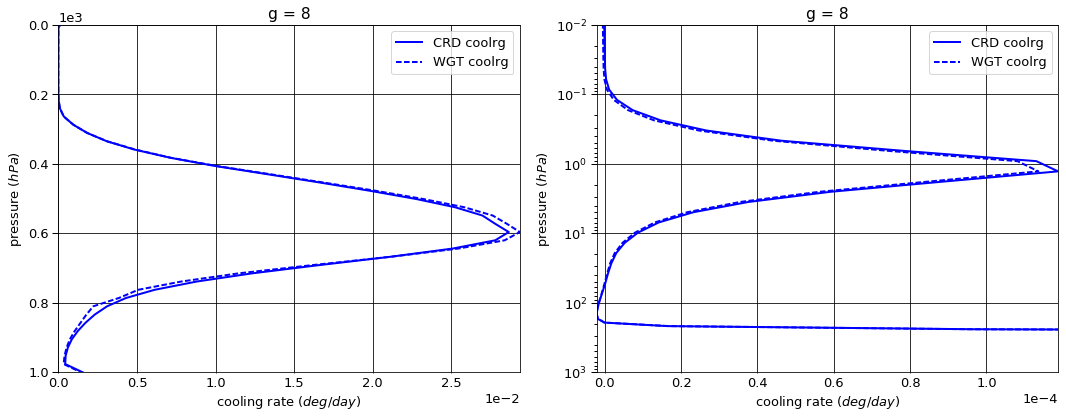

# Figure: cooling rate g-group 9

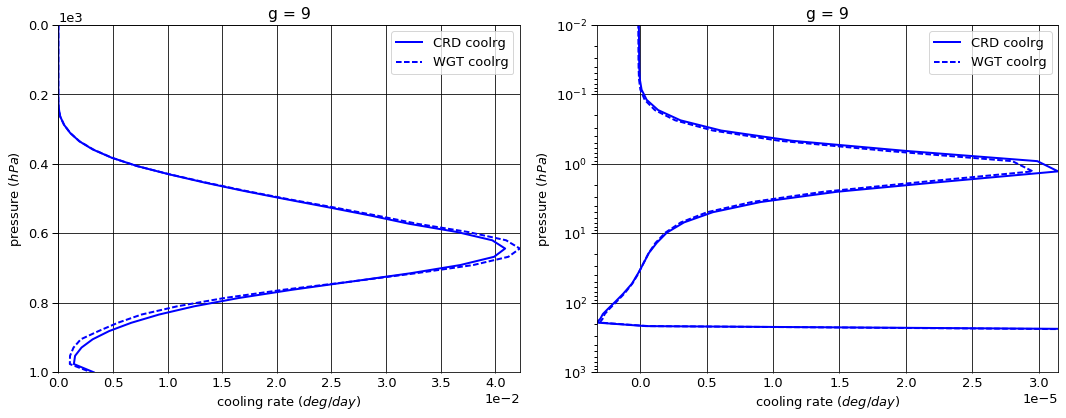

# Figure: cooling rate g-group 10

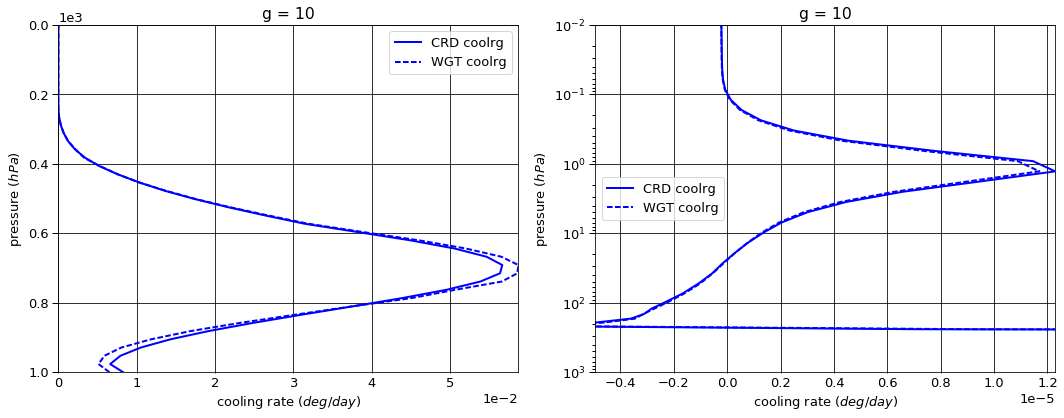

# Figure: cooling rate g-group 11

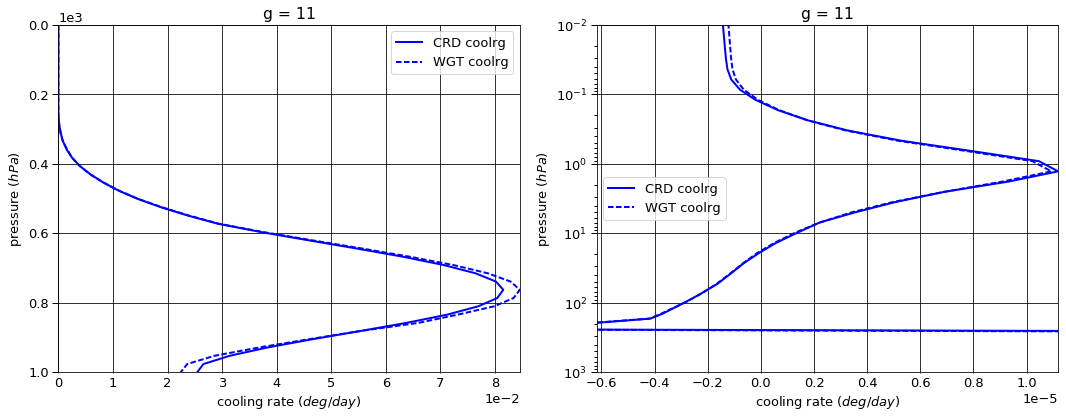

# Figure: cooling rate g-group 12

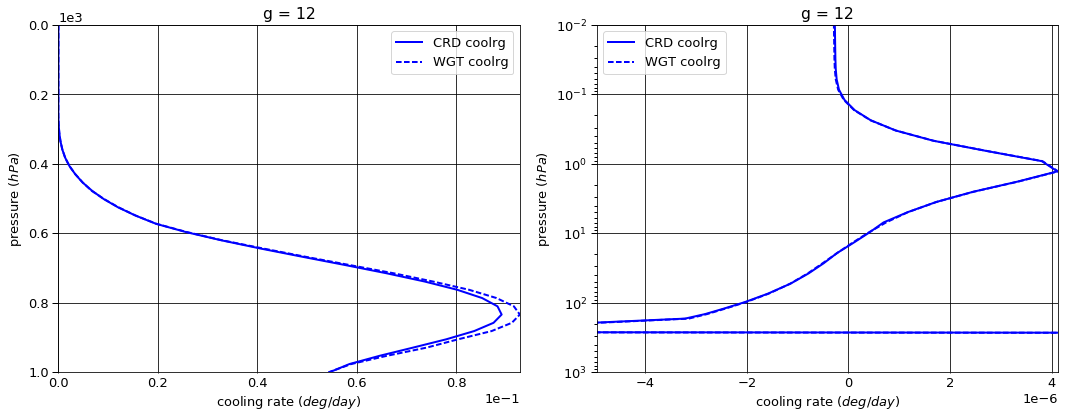

# Figure: cooling rate g-group 13

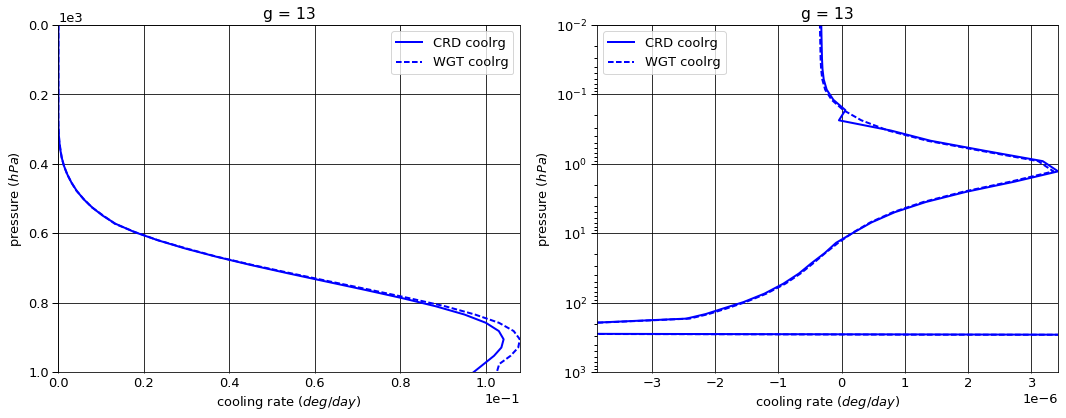

# Figure: cooling rate g-group 14

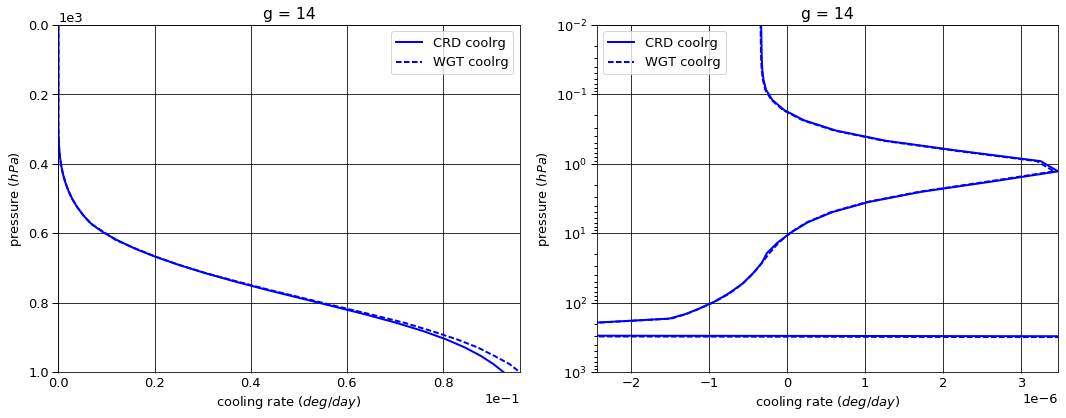

# Figure: cooling rate g-group 15

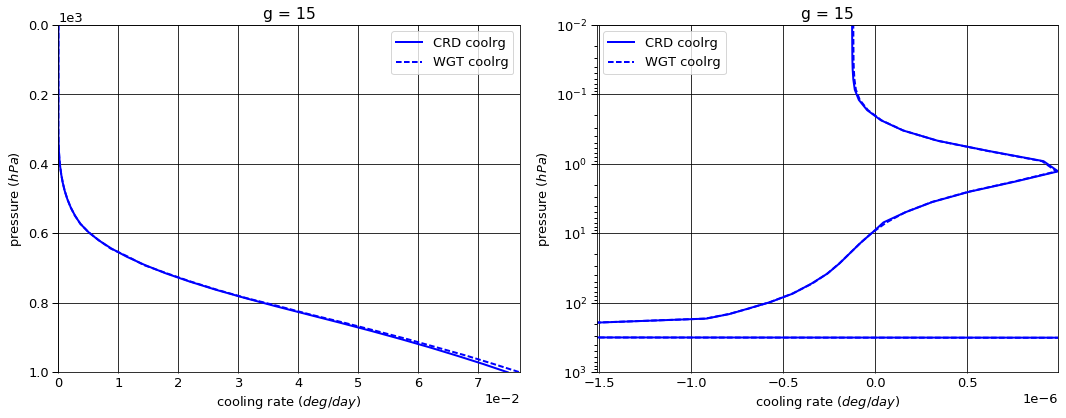

# Figure: cooling rate g-group 16

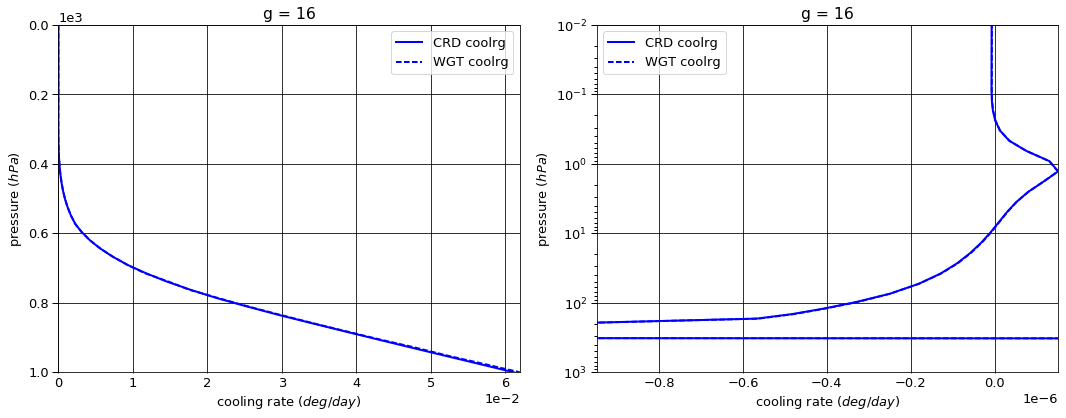

# Figure: cooling rate g-group 17

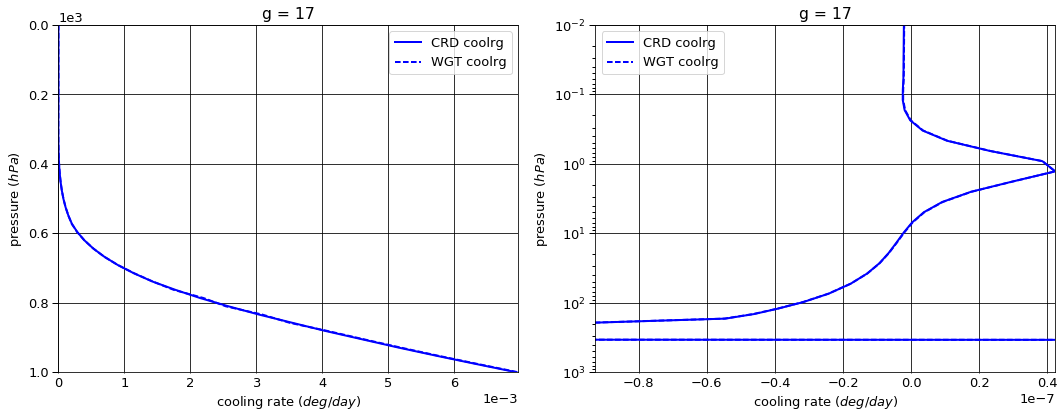

# Figure: cooling rate g-group 18

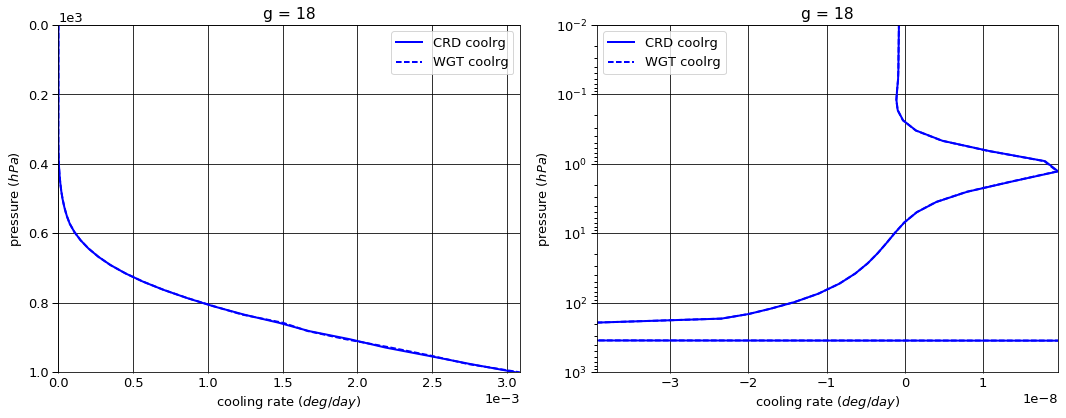

# Figure: cooling rate g-group total

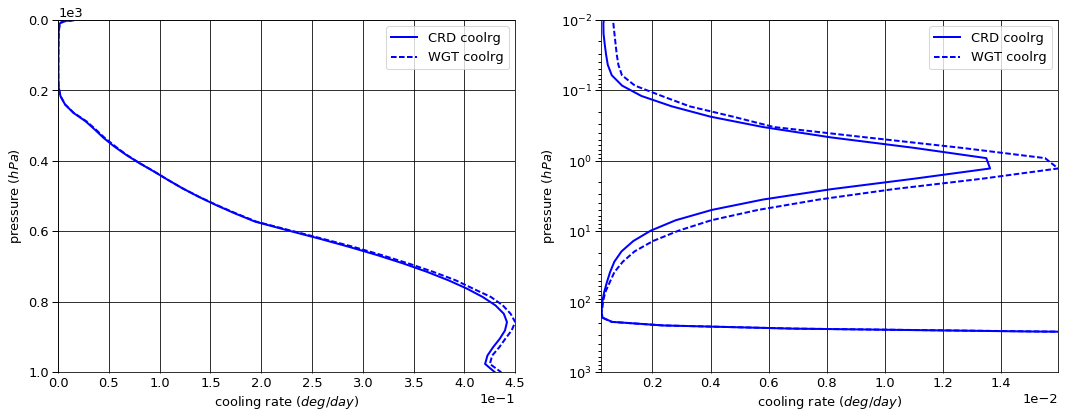

In [19]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [20]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg     fnetg
g  pressure level                              
1  0.0      1     -0.022768  0.000000 -0.022768
   1013.0   76    -0.053917  0.053890 -0.000026
2  0.0      1     -0.027358  0.000000 -0.027358
   1013.0   76    -0.060294  0.060264 -0.000030
3  0.0      1     -0.107391  0.000000 -0.107391
   1013.0   76    -0.234827  0.234708 -0.000120
4  0.0      1     -0.201899  0.000000 -0.201899
   1013.0   76    -0.403876  0.403669 -0.000207
5  0.0      1     -0.344521  0.000000 -0.344521
   1013.0   76    -0.633238  0.632892 -0.000346
6  0.0      1     -0.425042  0.000000 -0.425042
   1013.0   76    -0.716589  0.716027 -0.000562
7  0.0      1     -0.658802  0.000000 -0.658802
   1013.0   76    -1.032077  1.030245 -0.001833
8  0.0      1     -0.973172  0.000000 -0.973172
   1013.0   76    -1.412650  1.408358 -0.004292
9  0.0      1     -1.420633  0.000000 -1.420633
   1013.0   76    -1.927699  1.917542 -0.010157
10 0.0      1     -2.148469  0.000000 -2.148469
   1013.0   76    -2.733887  2.700254 -0.033633
11 0.0      1     -3.381895  0.000000 -3.381895
   1013.0   76    -4.068916  3.914976 -0.153940
12 0.0      1     -4.090779  0.000000 -4.090779
   1013.0   76    -4.681579  4.149106 -0.532473
13 0.0      1     -5.446778  0.000000 -5.446778
   1013.0   76    -5.947612  4.341144 -1.606467
14 0.0      1     -5.464071  0.000000 -5.464071
   1013.0   76    -5.772679  3.043489 -2.729190
15 0.0      1     -5.636286  0.000000 -5.636286
   1013.0   76    -5.830224  2.068482 -3.761742
16 0.0      1     -6.512942  0.000000 -6.512942
   1013.0   76    -6.645102  1.508662 -5.136440
17 0.0      1     -1.041124  0.000000 -1.041124
   1013.0   76    -1.054943  0.160138 -0.894805
18 0.0      1     -0.749085  0.000000 -0.749085
   1013.0   76    -0.754728  0.066922 -0.687805


WGT


flug      fldg     fnetg
g  pressure level                              
1  0.0      1     -0.022619  0.000000 -0.022619
   1013.0   76    -0.053917  0.053890 -0.000026
2  0.0      1     -0.027094  0.000000 -0.027094
   1013.0   76    -0.060294  0.060264 -0.000030
3  0.0      1     -0.105731  0.000000 -0.105731
   1013.0   76    -0.234827  0.234708 -0.000120
4  0.0      1     -0.199860  0.000000 -0.199860
   1013.0   76    -0.403876  0.403669 -0.000207
5  0.0      1     -0.341297  0.000000 -0.341297
   1013.0   76    -0.633238  0.632912 -0.000325
6  0.0      1     -0.422706  0.000000 -0.422706
   1013.0   76    -0.716589  0.716221 -0.000368
7  0.0      1     -0.655567  0.000000 -0.655567
   1013.0   76    -1.032077  1.030355 -0.001722
8  0.0      1     -0.969585  0.000000 -0.969585
   1013.0   76    -1.412650  1.408896 -0.003754
9  0.0      1     -1.415371  0.000000 -1.415371
   1013.0   76    -1.927699  1.919023 -0.008677
10 0.0      1     -2.140231  0.000000 -2.140231
   1013.0   76    -2.733887  2.710572 -0.023315
11 0.0      1     -3.371058  0.000000 -3.371058
   1013.0   76    -4.068916  3.962002 -0.106913
12 0.0      1     -4.080340  0.000000 -4.080340
   1013.0   76    -4.681579  4.249788 -0.431791
13 0.0      1     -5.440182  0.000000 -5.440182
   1013.0   76    -5.947612  4.453330 -1.494282
14 0.0      1     -5.460694  0.000000 -5.460694
   1013.0   76    -5.772679  3.108889 -2.663790
15 0.0      1     -5.634914  0.000000 -5.634914
   1013.0   76    -5.830224  2.099864 -3.730360
16 0.0      1     -6.512529  0.000000 -6.512529
   1013.0   76    -6.645102  1.519079 -5.126023
17 0.0      1     -1.041081  0.000000 -1.041081
   1013.0   76    -1.054943  0.160664 -0.894279
18 0.0      1     -0.749077  0.000000 -0.749077
   1013.0   76    -0.754728  0.067080 -0.687648


WGT - CRD


flug      fldg     fnetg
g  pressure level                              
1  0.0      1      0.000149  0.000000  0.000149
   1013.0   76     0.000000  0.000000  0.000000
2  0.0      1      0.000264  0.000000  0.000264
   1013.0   76     0.000000  0.000000  0.000000
3  0.0      1      0.001660  0.000000  0.001660
   1013.0   76     0.000000  0.000000  0.000000
4  0.0      1      0.002039  0.000000  0.002039
   1013.0   76     0.000000  0.000000  0.000000
5  0.0      1      0.003225  0.000000  0.003225
   1013.0   76     0.000000  0.000021  0.000021
6  0.0      1      0.002336  0.000000  0.002336
   1013.0   76     0.000000  0.000194  0.000194
7  0.0      1      0.003235  0.000000  0.003235
   1013.0   76     0.000000  0.000110  0.000110
8  0.0      1      0.003587  0.000000  0.003587
   1013.0   76     0.000000  0.000538  0.000538
9  0.0      1      0.005262  0.000000  0.005262
   1013.0   76     0.000000  0.001480  0.001480
10 0.0      1      0.008237  0.000000  0.008237
   1013.0   76     0.000000  0.010318  0.010318
11 0.0      1      0.010837  0.000000  0.010837
   1013.0   76     0.000000  0.047026  0.047026
12 0.0      1      0.010440  0.000000  0.010440
   1013.0   76     0.000000  0.100682  0.100682
13 0.0      1      0.006596  0.000000  0.006596
   1013.0   76     0.000000  0.112186  0.112186
14 0.0      1      0.003376  0.000000  0.003376
   1013.0   76     0.000000  0.065400  0.065400
15 0.0      1      0.001372  0.000000  0.001372
   1013.0   76     0.000000  0.031383  0.031383
16 0.0      1      0.000413  0.000000  0.000413
   1013.0   76     0.000000  0.010417  0.010417
17 0.0      1      0.000043  0.000000  0.000043
   1013.0   76     0.000000  0.000526  0.000526
18 0.0      1      0.000008  0.000000  0.000008
   1013.0   76     0.000000  0.000158  0.000158

# Table: cooling rate. g-groups 


CRD


coolrg
g  pressure    layer              
1  0.000312    1     -5.134819e-06
   1001.112500 75     9.545465e-06
2  0.000312    1      4.486674e-06
   1001.112500 75     1.083348e-05
3  0.000312    1      5.507472e-05
   1001.112500 75     4.309544e-05
4  0.000312    1      1.263917e-05
   1001.112500 75     7.467616e-05
5  0.000312    1      1.125673e-05
   1001.112500 75     1.279652e-04
6  0.000312    1      6.546672e-07
   1001.112500 75     2.205398e-04
7  0.000312    1     -1.905919e-07
   1001.112500 75     7.060495e-04
8  0.000312    1     -3.918335e-07
   1001.112500 75     1.552184e-03
9  0.000312    1     -1.375714e-07
   1001.112500 75     3.245734e-03
10 0.000312    1     -2.463953e-07
   1001.112500 75     8.281525e-03
11 0.000312    1     -1.663279e-06
   1001.112500 75     2.542632e-02
12 0.000312    1     -2.838007e-07
   1001.112500 75     5.453137e-02
13 0.000312    1     -3.392663e-07
   1001.112500 75     9.711039e-02
14 0.000312    1     -3.426286e-07
   1001.112500 75     9.261728e-02
15 0.000312    1     -1.252810e-07
   1001.112500 75     7.501091e-02
16 0.000312    1     -6.616492e-09
   1001.112500 75     6.111423e-02
17 0.000312    1     -1.927308e-09
   1001.112500 75     6.947776e-03
18 0.000312    1     -6.334300e-10
   1001.112500 75     3.062212e-03


WGT


coolrg
g  pressure    layer              
1  0.000312    1      2.343411e-04
   1001.112500 75     9.545465e-06
2  0.000312    1      1.505060e-05
   1001.112500 75     1.083348e-05
3  0.000312    1      1.106388e-04
   1001.112500 75     4.309544e-05
4  0.000312    1      1.988220e-05
   1001.112500 75     7.467616e-05
5  0.000312    1      5.838083e-06
   1001.112500 75     1.171812e-04
6  0.000312    1     -8.385030e-07
   1001.112500 75     1.326893e-04
7  0.000312    1     -9.528814e-07
   1001.112500 75     6.669120e-04
8  0.000312    1     -6.531534e-07
   1001.112500 75     1.431850e-03
9  0.000312    1     -1.662619e-07
   1001.112500 75     3.004686e-03
10 0.000312    1     -2.523033e-07
   1001.112500 75     6.532664e-03
11 0.000312    1     -1.423128e-06
   1001.112500 75     2.240276e-02
12 0.000312    1     -3.039623e-07
   1001.112500 75     5.434924e-02
13 0.000312    1     -3.589837e-07
   1001.112500 75     1.025747e-01
14 0.000312    1     -3.498215e-07
   1001.112500 75     9.596040e-02
15 0.000312    1     -1.187726e-07
   1001.112500 75     7.702960e-02
16 0.000312    1     -6.088133e-09
   1001.112500 75     6.192787e-02
17 0.000312    1     -1.840249e-09
   1001.112500 75     6.974496e-03
18 0.000312    1     -6.379331e-10
   1001.112500 75     3.088727e-03


WGT - CRD


coolrg
g  pressure    layer              
1  0.000312    1      2.394759e-04
   1001.112500 75     0.000000e+00
2  0.000312    1      1.056392e-05
   1001.112500 75     0.000000e+00
3  0.000312    1      5.556412e-05
   1001.112500 75     0.000000e+00
4  0.000312    1      7.243028e-06
   1001.112500 75     0.000000e+00
5  0.000312    1     -5.418651e-06
   1001.112500 75    -1.078394e-05
6  0.000312    1     -1.493170e-06
   1001.112500 75    -8.785056e-05
7  0.000312    1     -7.622895e-07
   1001.112500 75    -3.913742e-05
8  0.000312    1     -2.613199e-07
   1001.112500 75    -1.203344e-04
9  0.000312    1     -2.869048e-08
   1001.112500 75    -2.410473e-04
10 0.000312    1     -5.908010e-09
   1001.112500 75    -1.748861e-03
11 0.000312    1      2.401510e-07
   1001.112500 75    -3.023555e-03
12 0.000312    1     -2.016168e-08
   1001.112500 75    -1.821380e-04
13 0.000312    1     -1.971738e-08
   1001.112500 75     5.464271e-03
14 0.000312    1     -7.192880e-09
   1001.112500 75     3.343119e-03
15 0.000312    1      6.508420e-09
   1001.112500 75     2.018692e-03
16 0.000312    1      5.283587e-10
   1001.112500 75     8.136380e-04
17 0.000312    1      8.705910e-11
   1001.112500 75     2.671990e-05
18 0.000312    1     -4.503060e-12
   1001.112500 75     2.651460e-05

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-38.653016,0.000000,-38.653016
1013.0,76,-43.964837,28.410769,-15.554069



WGT


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-38.589936,0.000000,-38.589936
1013.0,76,-43.964837,28.791206,-15.173631



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,0.06308,0.000000,0.063080
1013.0,76,0.00000,0.380438,0.380438


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,0.000075
1001.112500,75,0.430093



WGT


,,coolrg
pressure,layer,
0.000312,1,0.000380
1001.112500,75,0.436332



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,0.000305
1001.112500,75,0.006239


In [21]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.00120,0.001265
2,0.00135,0.001402
3,0.00530,0.005394
4,0.00915,0.009234
5,0.01435,0.014471
6,0.01625,0.016370
7,0.02340,0.023579
8,0.03200,0.032315
9,0.04370,0.044057


In [22]:
# read and display overall absth
display.display(
    display.HTML(climahtml.getHTML_idanchor(s_abscom)))
display.display(
    display.Markdown(climahtml.getMarkdown_sectitle(s_abscom)))

display.display(pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'),
                sep=r'\s+',
                index_col=[0]))

# Overall absth

,abscom
g,
1,5.495709e-21
2,2.937919e-21
3,1.570565e-21
4,8.395994e-22
5,4.488366e-22
6,2.399409e-22
7,1.282686e-22
8,6.857039e-23
9,3.665664e-23


In [23]:
def spreadsheet():
    ng = crd.data['dgdgs'].dims['g']
    ng_refs = [18]
    p_refs = [600]
    
    df_abscom = pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'), 
                            sep=r'\s+', index_col=[0])
    
    # absth(g + 1) / absth(g)
    df_abscom_copy = df_abscom.copy()
    df_abscom_copy.index = df_abscom.index + 1
    df_absratio = df_abscom / df_abscom_copy
    df_absratio.columns = ['k(ig) / k(ig - 1)']
    df_absratio = df_absratio.loc[: ng]
    df_dgdgs = crd.data['dgdgs'].to_dataframe()
    
    
    df_dgdgs_cumsum = df_dgdgs.cumsum(axis=0)
    df_dgdgs_cumsum.columns = ['dg cumsum', 'dgs cumsum']
    
    data_pref = np.concatenate([p_ref * np.ones((ng_ref,)) 
                                for ng_ref, p_ref 
                                in zip(ng_refs, p_refs)], axis=0)
    df_pref = pd.DataFrame(data_pref, 
                           index=df_dgdgs.index, columns=['pref'])
    
    df_all = pd.concat([df_abscom, df_absratio,
                        df_dgdgs, df_dgdgs_cumsum,
                        df_pref], axis=1) 
    return df_all
    

In [24]:
display.display(display.HTML(climahtml.getHTML_idanchor(s_ggroup_summary)))
display.display(display.Markdown(climahtml.getMarkdown_sectitle(s_ggroup_summary)))
display.display(spreadsheet())

# g-group summary

,abscom,k(ig) / k(ig - 1),dg,dgs,dg cumsum,dgs cumsum,pref
g,,,,,,,
1,5.495709e-21,NaN,0.00120,0.001265,0.00120,0.001265,600.0
2,2.937919e-21,0.534584,0.00135,0.001402,0.00255,0.002667,600.0
3,1.570565e-21,0.534584,0.00530,0.005394,0.00785,0.008061,600.0
4,8.395994e-22,0.534584,0.00915,0.009234,0.01700,0.017295,600.0
5,4.488366e-22,0.534584,0.01435,0.014471,0.03135,0.031766,600.0
6,2.399409e-22,0.534584,0.01625,0.016370,0.04760,0.048136,600.0
7,1.282686e-22,0.534584,0.02340,0.023579,0.07100,0.071715,600.0
8,6.857039e-23,0.534584,0.03200,0.032315,0.10300,0.104029,600.0
9,3.665664e-23,0.534584,0.04370,0.044057,0.14670,0.148087,600.0


In [25]:
def load_d_bigsum():
    
    ng = 10
    
    fpath = os.path.join(crd.rundir, 'd_bigsum.dat')
    df = pd.read_csv(fpath, sep=r'\s+', index_col = [0, 1])

    g_layers = [(1, 62), (2, 58)]
    
    writer = pd.ExcelWriter('_'.join(['d_bigsum_absgas',
                                      'ng_{}'.format(ng)])
                            + '.xlsx')
    for g, layer in g_layers:
        df.loc[(g, layer), :].to_excel(writer, 
                                       '({}, {})'.format(g, layer))
        

#load_d_bigsum()

# `absmean`-to-`absmeanlog` Ratio

In [26]:
pd.set_option('display.max_rows', None)
display.display(
    pd.read_csv(os.path.join(crd.rundir, 'absmean.dat'), 
                index_col=[0, 1],
                sep=r'\s+')
    )
pd.reset_option('display.max_rows')

pressure       absmean    absmeanlog      ratio
layer g                                                     
1     1      0.000312  1.468201e-20  4.777880e-22  30.729126
      2      0.000312  9.242048e-22  1.046282e-22   8.833225
      3      0.000312  1.999934e-21  9.200377e-23  21.737522
      4      0.000312  3.560714e-22  1.315437e-23  27.068677
      5      0.000312  2.135059e-22  7.760010e-24  27.513609
      6      0.000312  1.658703e-23  1.527207e-24  10.861021
      7      0.000312  5.551927e-24  8.109859e-25   6.845899
      8      0.000312  1.682938e-24  2.848466e-25   5.908227
      9      0.000312  2.242374e-25  4.803110e-26   4.668588
      10     0.000312  1.881722e-25  4.650402e-26   4.046365
      11     0.000312  5.652121e-25  4.391957e-26  12.869253
      12     0.000312  9.211060e-26  2.082706e-26   4.422640
      13     0.000312  7.621361e-26  6.813916e-27  11.184995
      14     0.000312  6.842912e-26  8.151649e-27   8.394513
      15     0.000312  2.085608e-26  2.903781e-27   7.182388
      16     0.000312  9.049161e-28  5.140488e-28   1.760370
      17     0.000312  1.575303e-27  8.849904e-28   1.780022
      18     0.000312  7.257546e-28  4.793140e-28   1.514153
2     1      0.000750  1.477839e-20  4.778319e-22  30.928002
      2      0.000750  9.339142e-22  1.047705e-22   8.913905
      3      0.000750  2.011342e-21  9.216868e-23  21.822398
      4      0.000750  3.579388e-22  1.319727e-23  27.122192
      5      0.000750  2.148353e-22  7.763368e-24  27.672954
      6      0.000750  1.678831e-23  1.528508e-24  10.983461
      7      0.000750  5.599592e-24  8.133702e-25   6.884432
      8      0.000750  1.708938e-24  2.854315e-25   5.987209
      9      0.000750  2.281873e-25  4.813947e-26   4.740129
      10     0.000750  1.898251e-25  4.664796e-26   4.069311
      11     0.000750  5.668757e-25  4.407838e-26  12.860629
      12     0.000750  9.274926e-26  2.089038e-26   4.439807
      13     0.000750  7.669791e-26  6.853768e-27  11.190619
      14     0.000750  6.884742e-26  8.179128e-27   8.417453
      15     0.000750  2.099606e-26  2.916388e-27   7.199337
      16     0.000750  9.134693e-28  5.180864e-28   1.763160
      17     0.000750  1.594167e-27  8.924417e-28   1.786298
      18     0.000750  7.374646e-28  4.839300e-28   1.523908
3     1      0.001052  1.498505e-20  4.778660e-22  31.358258
      2      0.001052  9.548050e-22  1.050533e-22   9.088767
      3      0.001052  2.035768e-21  9.248043e-23  22.012962
      4      0.001052  3.619483e-22  1.328182e-23  27.251416
      5      0.001052  2.176837e-22  7.768774e-24  28.020348
      6      0.001052  1.722243e-23  1.530987e-24  11.249232
      7      0.001052  5.700235e-24  8.177033e-25   6.971031
      8      0.001052  1.765320e-24  2.866204e-25   6.159086
      9      0.001052  2.367633e-25  4.833898e-26   4.897979
      10     0.001052  1.933577e-25  4.693528e-26   4.119665
      11     0.001052  5.704448e-25  4.440005e-26  12.847842
      12     0.001052  9.410966e-26  2.101703e-26   4.477782
      13     0.001052  7.773345e-26  6.935591e-27  11.207906
      14     0.001052  6.974630e-26  8.235471e-27   8.469012
      15     0.001052  2.129584e-26  2.942200e-27   7.238065
      16     0.001052  9.314626e-28  5.263743e-28   1.769582
      17     0.001052  1.634775e-27  9.081895e-28   1.800037
      18     0.001052  7.627327e-28  4.935538e-28   1.545389
4     1      0.001476  1.520610e-20  4.779132e-22  31.817697
      2      0.001476  9.773445e-22  1.053623e-22   9.276039
      3      0.001476  2.061925e-21  9.281764e-23  22.214800
      4      0.001476  3.662419e-22  1.337379e-23  27.385039
      5      0.001476  2.207301e-22  7.774800e-24  28.390461
      6      0.001476  1.769261e-23  1.533746e-24  11.535553
      7      0.001476  5.809151e-24  8.224649e-25   7.063100
      8      0.001476  1.826857e-24  2.879139e-25   6.345151
      9      0.001476  2.461684e-25  4.855246e-26   5.070153
      10     0.001476  1.971883e-25  4.724026e-2

# Histogram of wavenumbers in g-group 1

In [27]:
#pd.read_csv(os.path.join(crd.rundir, 'ig1.dat')).hist()

In [28]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')
